# 0. Eigenface Demo
With given 39 human face image First, decide the number of Principal Component(PC) or the dimension with Singular Value Decomposition(SVD) Algorithm referencing the variance in \[0, 1\]. Second, reconstruct the face image with the eigenfaces. Last, find the owner of the test face image by using the minimum L2 distance.

# 1. Import packages for the Demo

In [1]:
import os
import glob
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 2. Functions for Step 1 : Select the number of PC

In [2]:
############# STEP1 FUNCS #############

def get_file_list(path_dir):
    files = os.listdir(path_dir)
    return [file for file in files if file.endswith(".pgm")]

def read_imgs(path_dir):
    files = get_file_list(path_dir)
    files.sort()
    imgs = []
    for file in files:
        imgs.append(cv2.imread(path_dir+'/'+file, -1))
    return imgs

def flat_imgs(imgs):
    H, W = imgs[0].shape
    L = len(imgs)
    result = np.zeros((H*W, L))
    for i, img in enumerate(imgs):
        temp = img.astype(np.uint8)
        result[:, i] = temp.reshape(H*W, )
    return np.array(result).astype(np.uint8)

def cal_number_of_PC(input_percentage, S):
    total = S.sum()
    sum = 0
    for i, sv in enumerate(S):
        sum += sv
        if sum/total >= input_percentage:
            return i+1

def print_step1(input_percentage, selected_dimension):
    print('##########  STEP 1  ##########')
    print(f"Input Percentage: {input_percentage}")
    print(f"Selected Dimension: {selected_dimension}")

# 2. Functions for Step 2 : Reconstruct image by Eigenfaces

In [3]:
############# STEP2 FUNCS #############

def save_img(img, idx, path_dir='./2019193016/face'):
    cv2.imwrite(path_dir+ f'{idx:02}.pgm', img)

def reconstruct(zero_mean_X, U, mean_img, number_of_PC):
    temp = np.matmul(np.transpose(U[:, :number_of_PC]), zero_mean_X)
    X_hat = np.clip(np.matmul(U[:, :number_of_PC], temp)+mean_img, 0, 255)
    return X_hat

def calculate_mse(X, X_hat):
    num_of_img = len(X[0])
    errors = []
    for i in range(num_of_img):
        error = sum(((X[:,i]-X_hat[:,i])/255)**2) 
        errors.append(error)
    average_error = np.mean(errors)
    return average_error, errors

def print_step2(average_error, errors):
    print()
    print('##########  STEP 2  ##########')
    print("Reconstruction error")
    print(f"average : {average_error:.4f}")
    for i,error in enumerate(errors):
        print(f"{i+1:02}: {error:.4f}")

# 3. Functions for Step 3 : Face Recognization with L2 Distance

In [4]:
############# STEP3 FUNCS #############
def get_l2dist(num_of_test_imgs, num_of_imgs, Y, Y_hat):
    dists = []
    for i in range(len(test_imgs)):
        dists.append([])               #initializing the dist list

    for i in range(num_of_test_imgs):
        test = Y_hat[:, i].reshape(len(Y_hat),1)
        diff = Y-test
        dist = diff**2
        for j in range(num_of_imgs):
            dists[i].append(np.sqrt(sum(dist[:,j])))
    return dists

def get_min_dist(dists):
    min_dist = []
    idxs = []
    for i in range(len(dists)):
        min_dist.append(np.min(dists[i]))
        idxs.append(dists[i].index(min_dist[i]) + 1)
    return min_dist, idxs

def print_step3(idxs):
    print()
    print('##########  STEP 3  ##########')
    for i in range(len(idxs)):
        print(f'test{i+1:02}.pgm ==> face{idxs[i]:02}.pgm')

In [5]:
input_percentage = 0.95 #float(sys.argv[1])
STUDENT_CODE = '2019193016'
FILE_NAME = 'output.txt'

path_dir = './faces_training'

imgs = read_imgs(path_dir)
X = (flat_imgs(imgs)).astype(np.float64)

if not os.path.exists(STUDENT_CODE) :
    os.mkdir(STUDENT_CODE)
f = open(os.path.join(STUDENT_CODE, FILE_NAME), 'w')
#sys.stdout = f

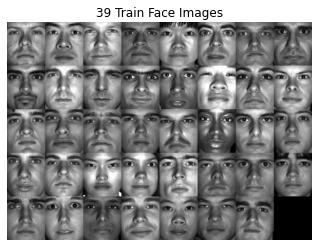

In [6]:
number_of_images = 39

all_faces_X = np.zeros((5*192, 8*168))
for i in range(39):
    row = int(i/8)
    col = i%8
    all_faces_X[row*192:(row+1)*192, col*168:(col+1)*168] = X[:, i].reshape(192, 168)

plt.imshow(all_faces_X, cmap = 'gray')
plt.title('39 Train Face Images')
plt.axis("off")
plt.show()

In [7]:
#####################################
#             STEP 1                #
#####################################
mean_img = np.ndarray((len(X),1))

for i in range(len(X)):             
    mean_img[i] = X[i, :].mean()    # get mean img with col-vector

zero_mean_X = np.subtract(X, mean_img) # get mean-centered matrix

U, S, V = np.linalg.svd(zero_mean_X, full_matrices=False) # run SVD

selected_dimension = cal_number_of_PC(input_percentage, S) # selecting the number of PC

print_step1(input_percentage, selected_dimension)   # print in format
 

##########  STEP 1  ##########
Input Percentage: 0.95
Selected Dimension: 34


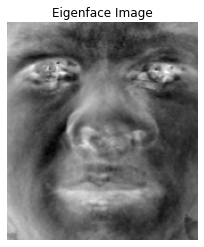

In [8]:
plt.imshow(U[:,0].reshape(192, 168), cmap = 'gray')
plt.title('Eigenface Image')
plt.axis("off")
plt.show()

In [9]:
#####################################
#             STEP 2                #
#####################################
X_hat = reconstruct(zero_mean_X, U, mean_img, selected_dimension)   # reconstruct img
for i in range(len(X_hat[0])):                                      # save the reconstructed image
    save_img(img = X_hat[:, i].reshape(192, 168), idx = i+1)
average_error, errors = calculate_mse(X, X_hat) # calculate the Mean Square Error
print_step2(average_error, errors) # print in format


##########  STEP 2  ##########
Reconstruction error
average : 8.1807
01: 8.8813
02: 4.9687
03: 5.5324
04: 22.2203
05: 0.2403
06: 1.5933
07: 34.8665
08: 6.2274
09: 7.8429
10: 24.8042
11: 31.0227
12: 2.3849
13: 1.8884
14: 0.2580
15: 2.0780
16: 1.4424
17: 1.8215
18: 0.4809
19: 5.1126
20: 38.3632
21: 0.8163
22: 0.6128
23: 2.7728
24: 10.7873
25: 0.3030
26: 0.8678
27: 1.2949
28: 0.5643
29: 0.5496
30: 5.3298
31: 5.2403
32: 1.2170
33: 20.2328
34: 0.6289
35: 37.8139
36: 4.0905
37: 4.9226
38: 17.8600
39: 1.1146


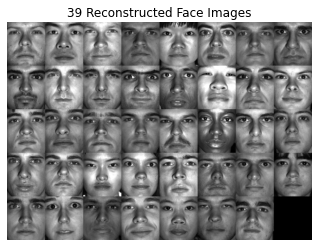

In [10]:
number_of_images = 39

all_faces_X_hat = np.zeros((5*192, 8*168))
for i in range(39):
    row = int(i/8)
    col = i%8
    all_faces_X_hat[row*192:(row+1)*192, col*168:(col+1)*168] = X_hat[:, i].reshape(192, 168)

plt.imshow(all_faces_X_hat, cmap = 'gray')
plt.title('39 Reconstructed Face Images')
plt.axis("off")
plt.show()

In [11]:
#####################################
#             STEP 3                #
#####################################

Y = X_hat # get reconstructed image's col-vec matrix

test_imgs = read_imgs('./faces_test')   # get test images
X_test = (flat_imgs(test_imgs)).astype(np.float64)  # make col-vec matrix

zero_mean_X_test = np.subtract(X_test, mean_img)    # get mean-centered matrix

Y_hat = reconstruct(zero_mean_X_test, U, mean_img, selected_dimension) # reconstruct the test image with eigenface that we got in step 1 and 2

dists = get_l2dist(len(test_imgs), len(imgs), Y, Y_hat) #calculate L2 distances

min_dist, idxs = get_min_dist(dists) # get min distance and the index

print_step3(idxs)

# for i in range(len(Y_hat[0])):                                      # save the reconstructed image
#     save_img(img = Y_hat[:, i].reshape(192, 168), idx = i+1, path_dir='./2019193016/face_test')


##########  STEP 3  ##########
test01.pgm ==> face11.pgm
test02.pgm ==> face04.pgm
test03.pgm ==> face19.pgm
test04.pgm ==> face23.pgm
test05.pgm ==> face35.pgm


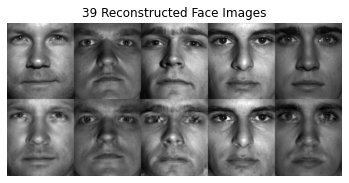

In [15]:
row = 2
col = 5
all_matched_images = np.zeros((192*row, 168*col))
for i in range(5):
    all_matched_images[:192, i*168:(i+1)*168] = X_test[:,i].reshape(192, 168)
    all_matched_images[192:, i*168:(i+1)*168] = Y_hat[:,i].reshape(192, 168)

plt.imshow(all_matched_images, cmap = 'gray')
plt.title('39 Reconstructed Face Images')
plt.axis("off")
plt.show()

In [13]:
#f.close()